In [13]:
import numpy as np
import IPython.display
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import shutil
from scipy.io import wavfile
%matplotlib inline

In [65]:
def wav_to_spectrogram(wav_path, save_path, show=False):
    y, sr = librosa.load(wav_path, sr=None)
    
    hop_length = int(0.015 * sr)
    n_fft = int(0.025 * sr)
    print hop_length, n_fft, len(y), sr

    S = librosa.feature.melspectrogram(
        y,
        sr=sr,
        n_mels=128,
        hop_length=hop_length,
        n_fft=n_fft,
    )
    log_S = librosa.power_to_db(S, ref=np.max)
    
    if show:
        plt.figure(figsize=(12,4))
        librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
        plt.title('mel power spectrogram')
        plt.colorbar(format='%+02.0f dB')
        plt.axis('off')
        plt.tight_layout()
    else:
        sizes = np.shape(log_S)
        height = float(sizes[0])
        width = float(sizes[1])
        
        # print height, width
        # print width/height, 1

        fig = plt.figure()
        fig.set_size_inches(width/height, 1, forward=False)
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)

        ax.imshow(log_S, cmap='gray', origin='lower')
        plt.savefig(save_path, dpi = height) 
        plt.close()
    
    return log_S, hop_length

In [68]:
path = '/home/kolegor/Study/Master/Work/data/clean/ab_Russian/train/2-fm-dostoevsky-belye-nochi-night2-part1_64kb.mp3.wav.chunk056.wav'

661 1102 441000 44100
(128, 668)


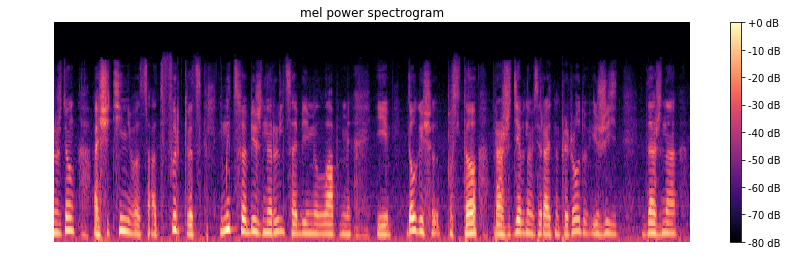

In [70]:
log_S, hop_length = wav_to_spectrogram(path, '/home/kolegor/test.spectrogram.png', show=True)
print log_S.shape

In [59]:
def add_sr_info_to_feature_files(language, dataset):
    wav_files_folder = '/home/kolegor/Study/Master/Work/data/clean/{}/{}/'.format(language, dataset)
    spc_files_folder = '/home/kolegor/Study/Master/Work/data/features/spectrogram/{}/{}/'.format(language, dataset)
    
    wav_files = set(os.listdir(wav_files_folder))
    spc_files = set(os.listdir(spc_files_folder))
    
    for i, spc_filename in enumerate(spc_files):
        if i % 100 == 99:
            print u' - {}/{}'.format(i, len(spc_files))
            break

        wav_filename = spc_filename.replace('.png', '.wav')
        
        full_wav_file = wav_files_folder + wav_filename
        full_spc_file = spc_files_folder + spc_filename
        
        _, sr1 = librosa.load(full_wav_file, sr=None)
        sr2, _ = wavfile.read(full_wav_file)
        
        if sr1 != sr2:
            print '!!!', full_wav_file, sr1, sr2
        
#         new_path = u'{path}#{sr}={winlen}={winstep}.png'.format(
#             path=full_spc_file,
#             sr=sr,
#             winlen=int(0.015 * sr),
#             winstep=int(0.025 * sr),
#         )

In [60]:
languages = ['ab_Russian', 'ab_Portuguese']
datasets = ['dev', 'train', 'test']

In [61]:
for language in languages:
    for dataset in datasets:
        print language, dataset
        add_sr_info_to_feature_files(language, dataset)

ab_Russian dev
 - 99/1330
ab_Russian train
 - 99/9308
ab_Russian test
 - 99/2660
ab_Portuguese dev
 - 99/1027
ab_Portuguese train
 - 99/7184
ab_Portuguese test
 - 99/2053


In [82]:
p = '/home/kolegor/Study/Master/Work/LangIS/src/../../data/clean//ab_Russian/train/Leo-Tolstoy-Detstvo-RUSSIAN-21-Do-Mazourki_64kb.mp3.wav.chunk049.wav'
d1, s1 = librosa.load(p, sr=None)
s2, d2 = wavfile.read(p)

In [83]:
print s1, s2
print d1.shape, d2.shape

24000 24000
(240000,) (240000, 2)


In [55]:
# for i in xrange(10000):
#     s2, d2 = wavfile.read(p)
#     if d2.dtype == 'int16':
#         nb_bits = 16 # -> 16-bit wav files
#     elif d2.dtype == 'int32':
#         nb_bits = 32 # -> 32-bit wav files
#     max_nb_bit = float(2 ** (nb_bits - 1))
#     samples = d2 / (max_nb_bit + 1.0)

In [56]:
# for i in xrange(10000):
#     d1, s1 = librosa.load(p, sr=None)

In [47]:
if d2.dtype == 'int16':
    nb_bits = 16 # -> 16-bit wav files
elif d2.dtype == 'int32':
    nb_bits = 32 # -> 32-bit wav files
max_nb_bit = float(2 ** (nb_bits - 1))
samples = d2 / (max_nb_bit + 1.0)

In [48]:
samples

array([ 0.03973267,  0.03927492,  0.03906131, ...,  0.00106808,
        0.0009155 ,  0.00094602])

In [49]:
d1

array([ 0.03973389,  0.03927612,  0.0390625 , ...,  0.00106812,
        0.00091553,  0.00094604], dtype=float32)

In [39]:
plt.figure(figsize=(12,4))
librosa.display.specshow(samples, sr=s1, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.axis('off')
plt.tight_layout()

IndexError: tuple index out of range

In [ ]:
path